# Assignment 1, Gradient Descent

Brent Staab

In this first assignment, we are applying python code that performs gradient descent to fit several models to the air quality data discussed in the lecture during the first week.  

## Requirements

1. Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells.  Plot `CO(GT)` air quality versus the hour of the day to verify you have prepared the data correctly.

2. Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the linear model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the linear model on the same graph.  All of this is illustrated here using a `cubic_model`.

3. Repeat this using a quadratic polynomial model.  Implement the model in functions named `quadratic_model` and `quadratic_model_gradient`. Try 3 to 5 learning rate `rho` values, such as 1.e-3 and 1.e-5, as you try to get the lowest error.

4. Repeat one more time using a quartic polynomial model.  Implement the model in a function named `quartic_model` and `quartic_model_gradient`. Again, try several learning rate `rho` values to get the lowest error.

For all results and plots, describe what you discover and describe what you see in the plots.

### Download the air quality data

In [4]:
#!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
#!unzip -o AirQualityUCI.zip

## Example use of required functions with very simple, toy data.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

In [16]:
X = np.array([0.1, 0.4, 0.7]).reshape(-1, 1)
X

array([[0.1],
       [0.4],
       [0.7]])

In [17]:
T = np.array([2.0, 1.0, 8.0]).reshape(-1, 1)
T

array([[2.],
       [1.],
       [8.]])

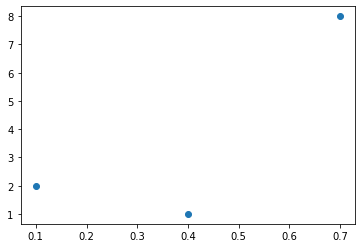

In [18]:
plt.plot(X, T, 'o');

In [47]:
def cubic_model(X, W):
    return np.hstack((X, X**2, X**3)) @ W[1:, :] + W[0, :]

def cubic_model_gradient(X, T, W):
    dEdY = -2 * (T - cubic_model(X, W))
    all_but_bias = np.hstack((X, 2 * X, 3 * X**2))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

In [48]:
W = np.array([2.0, 1.0, -0.5, 0.3]).reshape((-1, 1))
W

array([[ 2. ],
       [ 1. ],
       [-0.5],
       [ 0.3]])

In [49]:
cubic_model(X, W)

array([[2.0953],
       [2.3392],
       [2.5579]])

In [50]:
cubic_model_gradient(X, T, W)

array([[-2.67173333],
       [-2.17617333],
       [-4.35234667],
       [-4.902808  ]])

In [51]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, nSteps):
    # Commonly used parameter values
    alpha = rho
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    
    for step in range(nSteps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= alpha * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence

def rmse(model, X, T, W):
    Y = model(X, W)
    return np.sqrt(np.mean((T - Y)**2))

In [63]:
W = np.zeros((4, 1))
rho = 1.e-1
nSteps = 3000
W, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, rho, nSteps)
error_sequence[-1]

0.01302550037435562

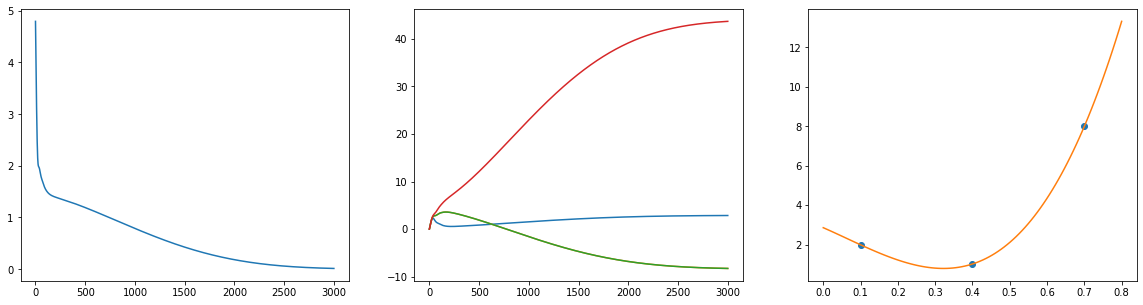

In [66]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(error_sequence)
plt.subplot(1, 3, 2)
plt.plot(W_sequence)
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
xs = np.linspace(0, 0.8, 100).reshape(-1, 1)
plt.plot(xs, cubic_model(xs, W));

Always label all axes of plots, using `plt.xlabel` and `plt.ylabel`.  So, don't follow my bad example here.

# Air Quality Data

Download and prepare the data.  The process is slightly modified from what we did in lecture.

In [68]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip -o AirQualityUCI.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1507k  100 1507k    0     0  2484k      0 --:--:-- --:--:-- --:--:-- 2479k
Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [67]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',',
                        usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data[:46]  # only use the first 46 samples
data = data.dropna(axis=0)
    
hour = np.array([int(t[:2]) for t in data['Time']])
CO = np.array(data['CO(GT)'])

T = CO.reshape(-1, 1)
Tnames = ['CO']
X = hour.reshape(-1, 1)
Xnames = ['Hour']
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)

X.shape = (43, 1) Xnames = ['Hour']
T.shape = (43, 1) Tnames = ['CO']


Add code cells here to implement the quadratic model and the quartic model, and to fit the models to the air quality data.

Also add markdown cells that explain each result and summarize your observations of the plots.

## Grading (details coming soon)

Your notebook will be run and graded automatically. Test this grading process by first downloading A1grader.tar and extract A1grader.py from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 90/90 if your functions are defined correctly. The remaining 10 points will be based on the results you obtain and on your discussions.

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You need not include code to test that the values passed in to your functions are the correct form.

## Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/86986).

Grading will be based on 

  * correct behavior of the required functions listed above,
  * easy to understand plots in your notebook,
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook.